# Bootstrapping a Libor Curve

Constructing a Libor curve from a combination of deposits and swaps

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from financepy.finutils import *
from financepy.products.libor import *

####################################################################
# FINANCEPY BETA Version 0.180 - This build:  22 Sep 2020 at 22:40 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#    For bug reports and comments - allmypythonprojects@gmail.com  #
####################################################################



In [4]:
tradeDate = FinDate(2019, 8, 9)
spotDays = 2
settlementDate = tradeDate.addDays(spotDays)

## Libor Deposits

In [5]:
dcType = FinDayCountTypes.ACT_360

In [6]:
depo1 = FinLiborDeposit(settlementDate, "1M", 0.022009, dcType)
depo2 = FinLiborDeposit(settlementDate, "2M", 0.022138, dcType)
depo3 = FinLiborDeposit(settlementDate, "3M", 0.021810, dcType)
depo4 = FinLiborDeposit(settlementDate, "6M", 0.020503, dcType)
depo5 = FinLiborDeposit(settlementDate, "12M", 0.019930, dcType)

In [7]:
depos = [depo1,depo2,depo3,depo4,depo5]

In [8]:
dcType = FinDayCountTypes.THIRTY_E_360_ISDA
fixedFreq = FinFrequencyTypes.SEMI_ANNUAL

## Interest Rate Swaps

In [9]:
dcType = FinDayCountTypes.THIRTY_E_360_ISDA
fixedFreq = FinFrequencyTypes.SEMI_ANNUAL
swapType = FinLiborSwapTypes.PAYER

In [10]:
swap1 = FinLiborSwap(settlementDate,"2Y",swapType,0.015910,fixedFreq,dcType)
swap2 = FinLiborSwap(settlementDate,"3Y",swapType,0.014990,fixedFreq,dcType)
swap3 = FinLiborSwap(settlementDate,"4Y",swapType,0.014725,fixedFreq,dcType)
swap4 = FinLiborSwap(settlementDate,"5Y",swapType,0.014640,fixedFreq,dcType)
swap5 = FinLiborSwap(settlementDate,"6Y",swapType,0.014800,fixedFreq,dcType)
swap6 = FinLiborSwap(settlementDate,"7Y",swapType,0.014995,fixedFreq,dcType)
swap7 = FinLiborSwap(settlementDate,"8Y",swapType,0.015180,fixedFreq,dcType)
swap8 = FinLiborSwap(settlementDate,"9Y",swapType,0.015610,fixedFreq,dcType)
swap9 = FinLiborSwap(settlementDate,"10Y",swapType,0.0159880,fixedFreq,dcType)
swap10 = FinLiborSwap(settlementDate,"12Y",swapType,0.016430,fixedFreq,dcType)

In [11]:
swaps = [swap1,swap2,swap3,swap4,swap5,swap6,swap7,swap8,swap9,swap10]

In [12]:
fras = []

# Bootstrapping The Curve

In [12]:
liborCurve = FinLiborCurve(settlementDate, depos, fras, swaps)

Can we show that the Libor deposits have been repriced at par

In [13]:
for depo in depos:
    v = depo.value(settlementDate, liborCurve)
    print(depo._notional, depo._maturityDate, v)

100.0 WED 11 SEP 2019 100.0
100.0 FRI 11 OCT 2019 100.0
100.0 MON 11 NOV 2019 99.99999999999999
100.0 TUE 11 FEB 2020 100.0
100.0 TUE 11 AUG 2020 100.0


In [14]:
for swap in swaps:
    v = swap.value(settlementDate, liborCurve, liborCurve, None)
    print(swap._notional, swap._maturityDate, v)

100.0 WED 11 AUG 2021 -3.1086244689504383e-15
100.0 THU 11 AUG 2022 1.9539925233402755e-14
100.0 FRI 11 AUG 2023 -1.687538997430238e-14
100.0 MON 12 AUG 2024 -2.6645352591003757e-14
100.0 MON 11 AUG 2025 -1.4210854715202004e-14
100.0 TUE 11 AUG 2026 -3.907985046680551e-14
100.0 WED 11 AUG 2027 -4.796163466380676e-14
100.0 FRI 11 AUG 2028 -2.6645352591003757e-14
100.0 MON 13 AUG 2029 -5.684341886080802e-14
100.0 MON 11 AUG 2031 -3.552713678800501e-14


The worst is 4 units error on a notional of 1 million units - but we need to investigate this

In [15]:
swap9.printFixedLeg()

AttributeError: 'FinLiborSwap' object has no attribute 'printFixedLeg'

In [16]:
swap9.printFloatLeg()

AttributeError: 'FinLiborSwap' object has no attribute 'printFloatLeg'

Do I need to adjust the final maturity flow date ?

## The Forward Curve

In [17]:
years = np.linspace(0, 15.0, 200)
dates = settlementDate.addYears(years)
fwds = liborCurve.fwd(dates)

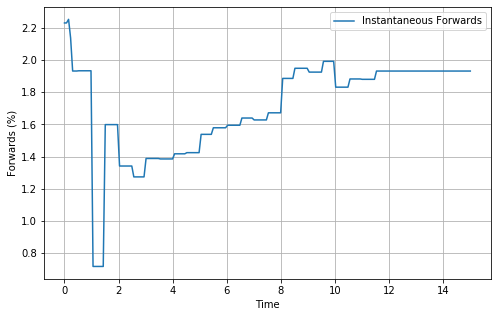

In [18]:
plt.figure(figsize=(8,5))
plt.plot(years,fwds*100, label="Instantaneous Forwards")
plt.xlabel("Time")
plt.ylabel("Forwards (%)")
plt.legend()
plt.grid()

Zoom in one the short end

In [19]:
years = np.linspace(0,1.0,1000)
dates = settlementDate.addYears(years)
fwds = liborCurve.fwd(dates)

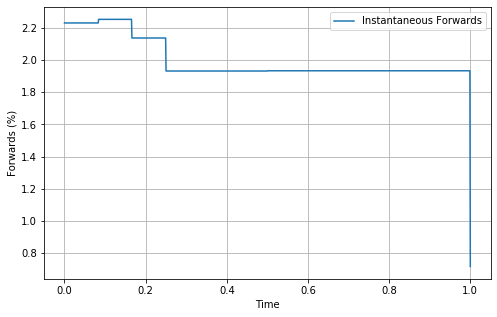

In [20]:
plt.figure(figsize=(8,5))
plt.plot(years,fwds*100, label="Instantaneous Forwards")
plt.xlabel("Time")
plt.ylabel("Forwards (%)")
plt.legend()
plt.grid()

## Extracting the Zero Rate Curves

We choose a range of zero rate frequencies.

In [48]:
years = np.linspace(1/365,5,100)
dates = settlementDate.addYears(years)
zerosC = liborCurve.zeroRate(dates, FinFrequencyTypes.CONTINUOUS)
zeros1 = liborCurve.zeroRate(dates, FinFrequencyTypes.ANNUAL)
zeros2 = liborCurve.zeroRate(dates, FinFrequencyTypes.SEMI_ANNUAL)
zeros4 = liborCurve.zeroRate(dates, FinFrequencyTypes.QUARTERLY)

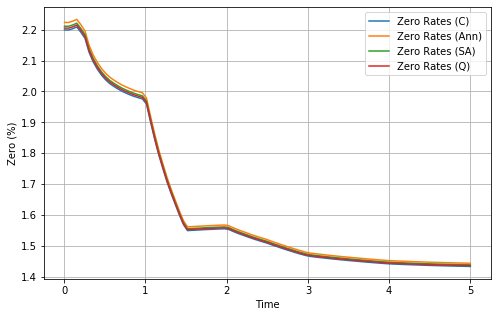

In [49]:
plt.figure(figsize=(8,5))
plt.plot(years,zerosC*100, label="Zero Rates (C)")
plt.plot(years,zeros1*100, label="Zero Rates (Ann)")
plt.plot(years,zeros2*100, label="Zero Rates (SA)")
plt.plot(years,zeros4*100, label="Zero Rates (Q)")
plt.xlabel("Time")
plt.ylabel("Zero (%)")
plt.legend()
plt.grid()

Copyright (c) 2020 Dominic O'Kane